## Problem 1
The goal of this exercise is to observe heteroskedasticity on simulated data.

1. Draw $x_1 \sim \mathcal{N}(2,3),aux \sim \mathcal{N}(0,1), n=10000$ times and generate $u=2x_1 \times aux, y=2+3x_1+u$.

In [11]:
# Calling packages
using DataFrames, CSV, Statistics, Plots, Distributions
using Random, LinearAlgebra, StatsModels, GLM, RDatasets

In [28]:
# Generate variables
# Generate $x_1$
ud_1=Uniform(2,3)
x_1=rand(ud_1,10000)
# Generate $aux$
ud_aux=Uniform(0,1)
aux=rand(ud_aux,10000)
#Generate u#
u=2x_1.*aux
#Generate y#
y=2 .+ 3x_1 .+u


10000-element Vector{Float64}:
 10.391542024172091
  8.976977173565283
 12.994949356028851
  9.874497738558684
 11.541380033588807
 11.507334141318848
 10.78582657283585
 11.616315754899562
 10.860301550381884
 11.394353026077813
  ⋮
 11.158814315796567
 15.398292425435939
 11.473614147451734
 13.181341234281987
 10.350877860390355
 13.122538759399065
 11.943578785157426
 11.463455012549547
 13.681915629782253

2. Regress $y$ on $x_1$. Show a scatter plot of the regression residuals on $x_1$. What do you observe?

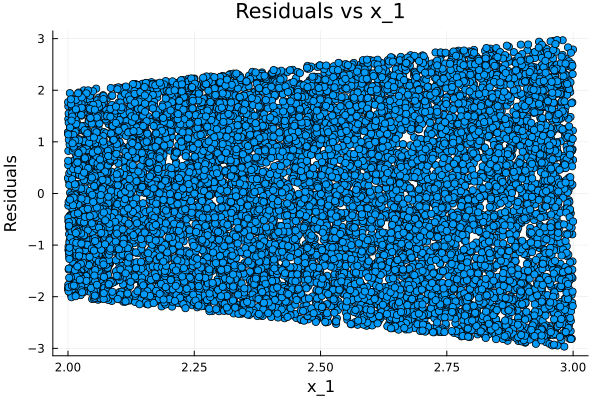

In [29]:
# Regress $y$ on $x_1$
df_1 = DataFrame(y=y, x_1=x_1, u=u, aux=aux)
model_1 = lm(@formula(y ~ x_1), df_1)
# Retrieve the residuals
res_1 = residuals(model_1)
# Scatter plot of the residuals
scatter(df_1.x_1,res_1,title="Residuals vs x_1",xlabel="x_1",ylabel="Residuals",legend=false)

3. The White test aims at testing for heteroscedasticy. Its null hypothesis is $H_0:\sigma_i=\sigma_j \forall i, j$. Follow these steps to perform a White test:

    (a) Obtain predicted values $\hat{y}_i$ and residuals $\hat{u}_i$ from regression in 2.

In [30]:
# Generate predicted values for $\hat{y}_i$
y_hat_1 = predict(model_1)



10000-element Vector{Float64}:
 11.302693330171236
 10.83429340883825
 13.726602457902219
 11.192920021242823
 11.644187254775177
 10.029763567537888
 11.942018385992649
 12.079239818378984
 10.488842100247318
 11.409634305068979
  ⋮
 10.013939293601556
 12.91606067771658
 12.714081151413383
 13.250004626971442
 10.460896155023613
 11.717298468181944
 12.781652017074505
 12.369223147572848
 12.824753948183915

In [31]:
# Generate predicted values for $\hat{u}_i$
u_hat_1 = y_hat_1 - df_1.y

10000-element Vector{Float64}:
  0.9111513059991445
  1.8573162352729664
  0.7316531018733681
  1.3184222826841392
  0.10280722118637087
 -1.4775705737809606
  1.1561918131567985
  0.46292406347942183
 -0.3714594501345658
  0.015281278991166047
  ⋮
 -1.144875022195011
 -2.482231747719359
  1.2404670039616494
  0.0686633926894551
  0.1100182946332584
 -1.4052402912171207
  0.8380732319170789
  0.9057681350233011
 -0.8571616815983383

 (b) Estimate the following model: $\hat{u}_i=\delta_0 + \delta_1 \hat{y}_i+ \delta_2 \hat{y}_i^2$. Call $R_\epsilon^2$ its R-squared.

In [32]:
# Generate another DataFrame
df_2 = DataFrame(u_hat_1_squared=u_hat_1 .^2,y_hat_1=y_hat_1,y_hat_1_squared=y_hat_1.^2)
# Regress $u_i$ on $\hat{y}_i$
model_2 = lm(@formula(u_hat_1_squared ~ y_hat_1 + y_hat_1_squared), df_2)
# Retrieve R-sqaured
r2_1 = r2(model_2)

0.05564036644998749

(c) Under $H_0$ , the $nR_\epsilon^2$ statistics follows a $\mathcal{X}^2(2)$. Display the test threshold at the $5%$ level. What can you conclude.

In [33]:
# Generate chi-square with df=2
chi2= Chisq(2)
# Generate the threshold at 5% level
threshold = quantile(chi2,0.95)
println("Threshold: ", threshold)

Threshold: 5.99146454710798


In [34]:
# Generate $nR_\epsilon^2$
nR2_1 = r2_1 * 10000
println("n*R^2: ", nR2_1)


n*R^2: 556.4036644998749


Since $nR_\epsilon^2 > Threshold$, we can reject the null hypothesis that the residuals have homoskedasticity.